# Final Project - Clustering Volcanoes according to eruption time

The 'eruptions.csv' file contains 10000 rows of volcanic activity information. The first column is the duration of the eruption, and the second is time between two eruptions. Clustering should be applied on the entire dataset. 

### Perform the following operations:
1. Read the dataset in python using pandas. Plot a scatter of the two columns. 
2. Run the Kmeans algorithm on this dataset(using random). Choose the appropriate number of clusters for this data. 
3. Plot the output of Kmeans, colored according to clusters and obtained centroids. 
5. For each cluster plot the line from the centroid to the farthest point in the cluster. 
6. Find out all the points in the cluster which have a distance greater than the mean of the cluster, . 
6. What is average distance of each cluster? (From the centroid to all points in the cluster)
7. For the following points, find out which cluster they fall in?  
dur_eruptions = 2.5, 3.0, 3.2, 4.5, 5.0, 1.5  
wait_time_btn_eruptions = 70, 55, 70, 80, 70, 100  
Plot these points in separate markers & color along with the clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv('./data/eruptions.csv')
df.head()

,dur_eruptions,wait_time_btn_eruptions
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


## 1. Read the dataset in python using pandas. Plot a scatter of the two columns. 

Text(0.5,1,'Duration of Eruptions vs Wait Time between Eruptions')

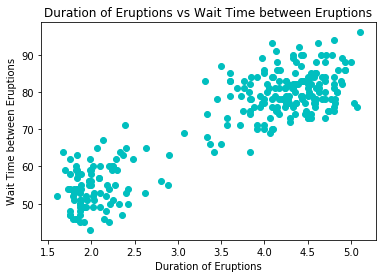

In [3]:
plt.scatter(df.dur_eruptions,df.wait_time_btn_eruptions,c='c')
plt.xlabel('Duration of Eruptions')
plt.ylabel('Wait Time between Eruptions')
plt.title('Duration of Eruptions vs Wait Time between Eruptions')

## 2. Run the Kmeans algorithm on this dataset(using random). Choose the appropriate number of clusters for this data. 

In [4]:
kmeans=KMeans(n_clusters=2,init='random')
y_kmeans=kmeans.fit_predict(df)
c=kmeans.cluster_centers_

## 3. Plot the output of Kmeans, colored according to clusters and obtained centroids. 

Text(0.5,1,'Clustering of Volcanoes')

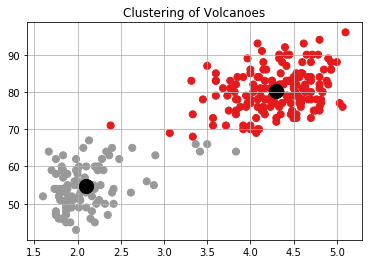

In [5]:
plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'],c=y_kmeans,s=50,cmap='Set1')
plt.grid()
plt.scatter(c[:,0],c[:,1],c='black',s=200)
plt.title('Clustering of Volcanoes')


## 4. For each cluster plot the line from the centroid to the farthest point in the cluster. 

Max Distance from Cluster 0 [5.1, 96.0] 

Max Distance from Cluster 1 [2.133, 67.0] 



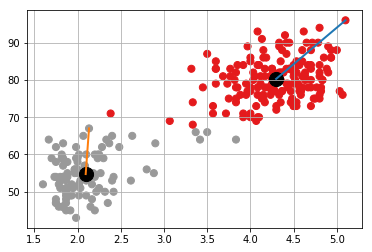

In [6]:
from scipy.spatial import distance
cluster_0=np.where(y_kmeans==0)
cluster_1=np.where(y_kmeans==1)

X_cluster_0=df.iloc[cluster_0]
X_cluster_1=df.iloc[cluster_1]
dist_0=[]
max_0=0
for i in range(len(X_cluster_0)):
    dist_0.append(distance.euclidean(X_cluster_0.iloc[i],c[0]))
dist_1=[]
max_1=0
for i in range(len(X_cluster_1)):
    dist_1.append(distance.euclidean(X_cluster_1.iloc[i],c[1]))
max_dist_0=dist_0.index(max(dist_0))
max_dist_1=dist_1.index(max(dist_1))
print("Max Distance from Cluster 0",X_cluster_0.iloc[max_dist_0].tolist(),"\n")
print("Max Distance from Cluster 1",X_cluster_1.iloc[max_dist_1].tolist(),"\n")
plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'],c=y_kmeans,s=50,cmap='Set1')
plt.grid()

x_0=(X_cluster_0.iloc[max_dist_0].tolist()[0],c[0][0])
y_0=(X_cluster_0.iloc[max_dist_0].tolist()[1],c[0][1])

x_1=(X_cluster_1.iloc[max_dist_1].tolist()[0],c[1][0])
y_1=(X_cluster_1.iloc[max_dist_1].tolist()[1],c[1][1])

plt.scatter(c[:,0],c[:,1],c='black',s=200)
plt.plot(x_0,y_0,lw=2)
plt.plot(x_1,y_1,lw=2)

## 5. Find out all the points in the cluster which have a distance greater than the mean of the cluster.

In [7]:
mean_0=np.mean(dist_0)
mean_1=np.mean(dist_1)

In [8]:

dist_0_greater=np.where(dist_0>mean_0)
dist_1_greater=np.where(dist_1>mean_1)
print("Points having distance greater than the mean of the cluster")
print("For Cluster 0")
df.iloc[dist_0_greater]

Points having distance greater than the mean of the cluster
For Cluster 0


,dur_eruptions,wait_time_btn_eruptions
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
5,2.883,55
12,4.200,78
13,1.750,47
18,1.600,52
21,1.750,47
23,3.067,69


In [9]:
print("For Cluster 1")
df.iloc[dist_1_greater]

For Cluster 1


,dur_eruptions,wait_time_btn_eruptions
1,1.800,54
5,2.883,55
7,3.600,85
10,1.833,54
12,4.200,78
14,4.700,83
18,1.600,52
23,3.067,69
25,3.600,83
26,1.967,55


## 6. What is average distance of each cluster? (From the centroid to all points in the cluster)

In [10]:
#Avg Distance 
print("Centroid of Cluster 0 ",sum(dist_0)/len(dist_0))
print("Centroid of Cluster 1 ",sum(dist_1)/len(dist_1))

Centroid of Cluster 0  4.5564937327785975
Centroid of Cluster 1  4.899078763179232


## 7. For the following points, find out which cluster they fall in?  
dur_eruptions = 2.5, 3.0, 3.2, 4.5, 5.0, 1.5  
wait_time_btn_eruptions = 70, 55, 70, 80, 70, 100  
Plot these points in separate markers & color along with the cluster

[0 1 0 0 0 0]


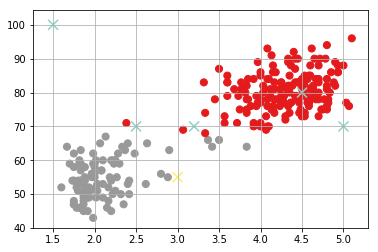

In [11]:
df1 = pd.DataFrame(data={"dur_eruptions":[ 2.5, 3.0, 3.2, 4.5, 5.0, 1.5], 'wait_time_btn_eruptions':[70, 55, 70, 80, 70, 100]})
y_kmeans1=kmeans.predict(df1)
print(y_kmeans1)
plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'],c=y_kmeans,s=50,cmap='Set1')
plt.grid()
plt.scatter(df1['dur_eruptions'],df1['wait_time_btn_eruptions'],c=y_kmeans1,s=100,marker='x',cmap='Set3')


[0 1 0 0 0]


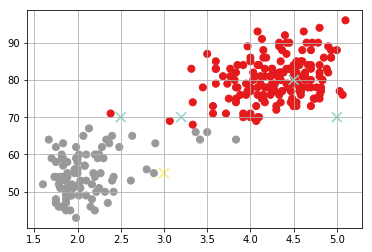

In [12]:
ridx0=[]
ridx1=[]
inpcluster_0=np.where(y_kmeans1==0)
inpcluster_1=np.where(y_kmeans1==1)
X_inpcluster_0=df1.iloc[inpcluster_0]
X_inpcluster_1=df1.iloc[inpcluster_1]
dist_inp0=[]
maxinp_0=0
for i in range(len(X_inpcluster_0)):
    dist_inp0.append(distance.euclidean(X_inpcluster_0.iloc[i],c[0]))
dist_inp1=[]
maxinp_1=0
for i in range(len(X_inpcluster_1)):
    dist_inp1.append(distance.euclidean(X_inpcluster_1.iloc[i],c[1]))
for i in dist_inp0:
    if (i>max(dist_0)):
        ridx0.append(dist_inp0.index(i))
for i in dist_inp1:
    if (i>max(dist_1)):
        ridx1.append(dist_inp1.index(i))

for i in ridx0:
    df1=df1.drop(df1.index[inpcluster_0[0][i]])
    
for i in ridx1:
    df1=df1.drop(df1.index[inpcluster_1[0][i]])
    
y_kmeans1=kmeans.predict(df1)
print(y_kmeans1)
plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'],c=y_kmeans,s=50,cmap='Set1')
plt.grid()
plt.scatter(df1['dur_eruptions'],df1['wait_time_btn_eruptions'],c=y_kmeans1,s=100,marker='x',cmap='Set3')



